# **Linear Regression**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path

file_path = Path(r"C:\Users\KIIT0001\Downloads\housing_price_dataset.csv")
df = pd.read_csv(file_path)

In [2]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nColumn names:")
print(df.columns.tolist())

Dataset Shape: (5000, 6)

First few rows:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0       79545.45857             5.682861                   7.009188   
1       79248.64245             6.002900                   6.730821   
2       61287.06718             5.865890                   8.512727   
3       63345.24005             7.188236                   5.586729   
4       59982.19723             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09      23086.80050  1.059034e+06  
1                          3.09      40173.07217  1.505891e+06  
2                          5.13      36882.15940  1.058988e+06  
3                          3.26      34310.24283  1.260617e+06  
4                          4.23      26354.10947  6.309435e+05  

Column names:
['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population', 'P

In [3]:
# Select a single feature for 2D plotting
X = df[['Avg. Area Income']]   # independent variable
y = df['Price']                # dependent variable

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict y values
y_pred = model.predict(X)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate R^2 Score
r2 = r2_score(y, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 73645940735.13448
R^2 Score: 0.40925930704314073


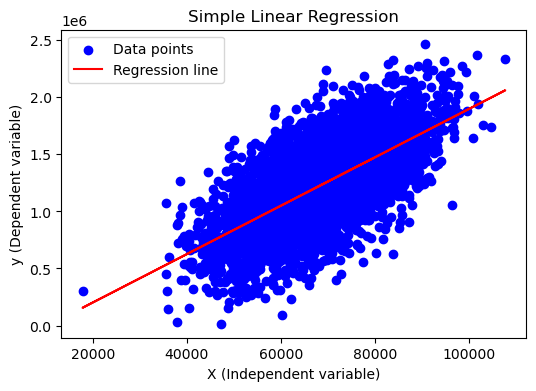

In [7]:
# Plotting the data points and the regression line
plt.figure(figsize=(6, 4))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('X (Independent variable)')
plt.ylabel('y (Dependent variable)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()